# Effect of COVID-19 on prescribing of Dependence Forming Medicines and the associated health utilisation

Data for this research has been run on the TPP system which covers approximately 40% of all practices, with a total population of approximately ?? Jan-19, rising to approximately ?? Feb-23.

Population = patients registered, have not died and <=120 years of age.

Research population = patients registered, have not died, <=120 years of age, on a dependence forming medication and do not have cancer.

#### Report 3 - focus on the demographics of the research population; a. focus on age bands

In [198]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

# set month for covid reference line
covid = ("2022-03-01")

# set position for covid text
pos_text_covid = ("2022-02-01")

# set month for chart labels
pos_chart_labels = ("2022-09-01")

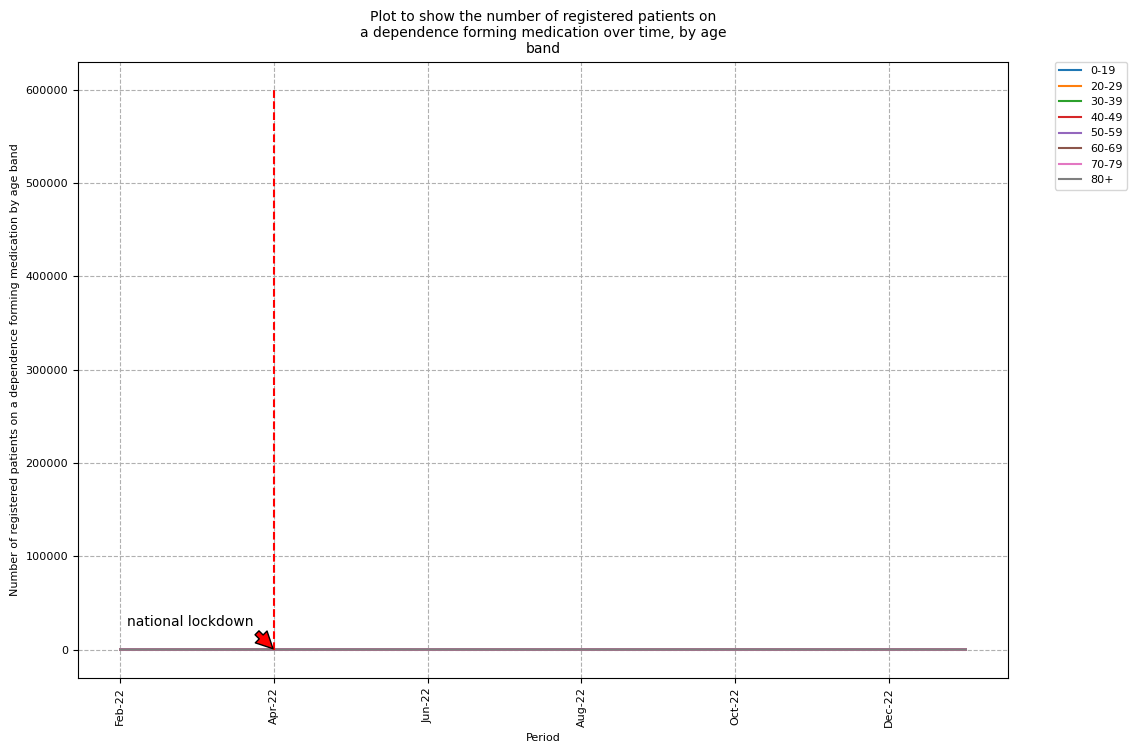

In [199]:
data_measure_dfm_medications_age_rate = pd.read_csv("../output/measure_dfm_medications_by_age_band_rate.csv", parse_dates=["date"])
data_measure_dfm_medications_age_rate = data_measure_dfm_medications_age_rate.loc[data_measure_dfm_medications_age_rate["age_band"] != "missing", :]
df_measure_dfm_medications_age_rate = pd.DataFrame.pivot(data_measure_dfm_medications_age_rate, index='date', columns='age_band', values='research_population')
df_measure_dfm_medications_age_rate.index = pd.to_datetime(df_measure_dfm_medications_age_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_age_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=600000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_age_band_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()



In [200]:
print(tabulate(df_measure_dfm_medications_age_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_age_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22     252      243      263      245      279      245      247    215
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Jan-23     263      253      255      260      242      245      244    228


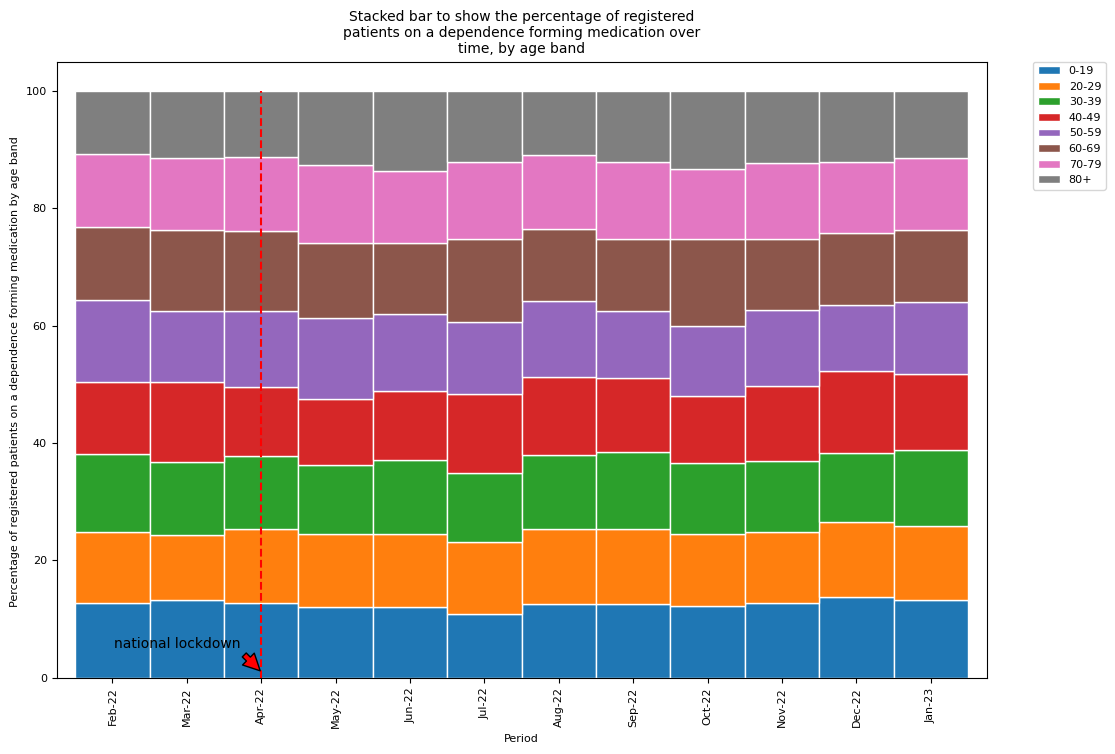

In [201]:
df_age_stacked = pd.DataFrame(df_measure_dfm_medications_age_rate)
df_age_stacked.head()
totam = df_age_stacked.sum(axis=1)
peram = df_age_stacked.div(totam, axis=0).mul(100).round(2)
ax = peram.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by age band ', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_age_band_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [202]:
print(tabulate(peram.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(peram.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22   12.67    12.22    13.22    12.32    14.03    12.32    12.42  10.81
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Jan-23   13.22    12.71    12.81    13.07    12.16    12.31    12.26  11.46


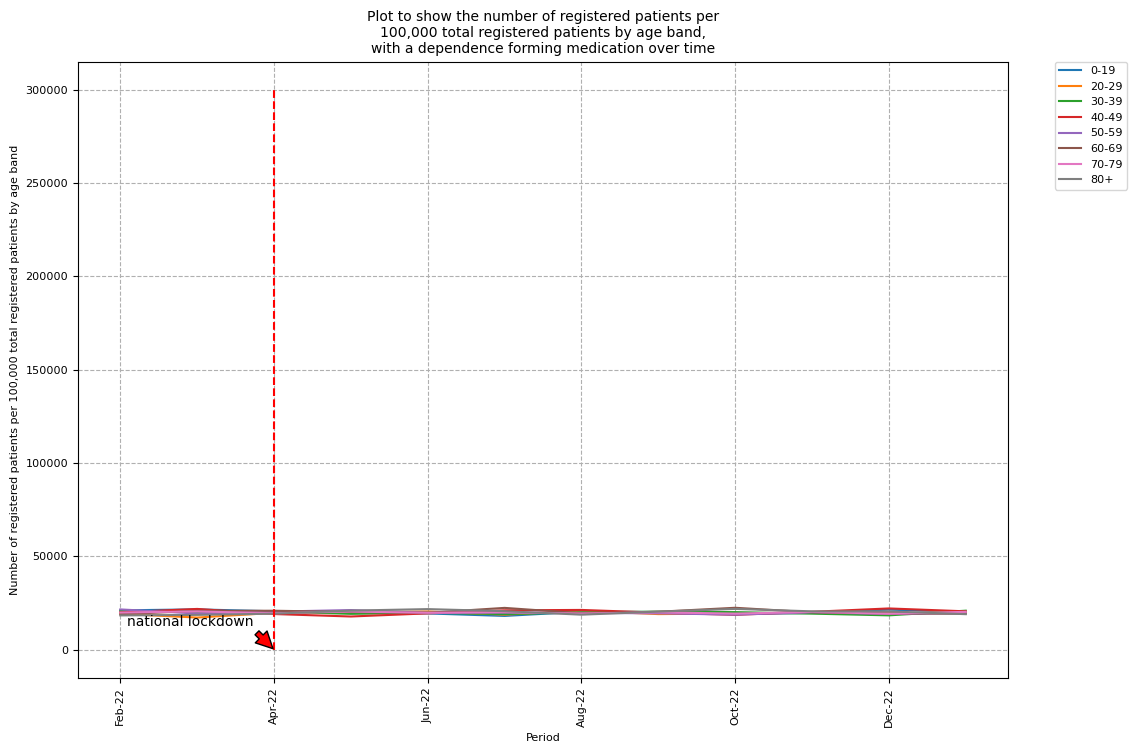

In [203]:
df_temp = pd.DataFrame(data_measure_dfm_medications_age_rate)
df_age_research_population=df_temp.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df_age_research_population = pd.DataFrame.pivot(df_age_research_population, index='date', columns='age_band', values='weighted_research_population')
df_age_research_population.index = pd.to_datetime(df_age_research_population.index).strftime('%b-%y')
ax = df_age_research_population.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=300000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients per 100,000 total registered patients by age band, with a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_age_band_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [204]:
print(tabulate(df_age_research_population.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_age_research_population.iloc[-1:], headers='keys', tablefmt = 'simple'))

date       0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
------  -------  -------  -------  -------  -------  -------  -------  -------
Feb-22  21087.9  19209.5  20839.9  20016.3  21594.4    19007  19919.4  18376.1
date       0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
------  -------  -------  -------  -------  -------  -------  -------  -------
Jan-23  20122.4    20240  20918.8  20569.6  19547.7  19321.8  20299.5  19047.6


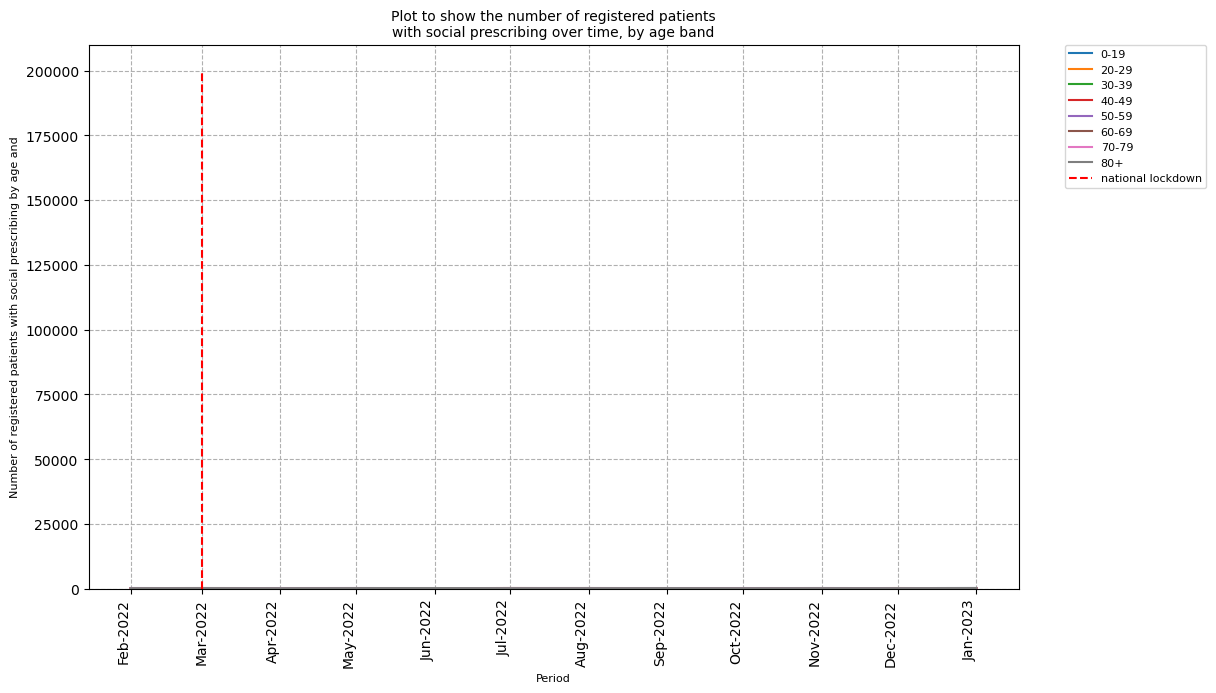

In [205]:
data_measure_social_prescribing_age_rate = pd.read_csv("../output/measure_compare_medications_by_age_band_socialrx_v_consultation_rate.csv", usecols=["date", "age_band", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_social_prescribing_age_rate = data_measure_social_prescribing_age_rate.loc[data_measure_social_prescribing_age_rate["with_social_prescribing"] == 1, :]
data_measure_social_prescribing_age_rate = data_measure_social_prescribing_age_rate.loc[data_measure_social_prescribing_age_rate["age_band"] != "missing", :]
df = pd.DataFrame(data=data_measure_social_prescribing_age_rate)
df2 = df.groupby(['date', 'age_band']).population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients with social prescribing by age and', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=200000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients with social prescribing over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_age_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [206]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2022-02-01 00:00:00     249      245      256      253      276      248      235    225
date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2023-01-01 00:00:00     278      235      242      269      232      242      227    262


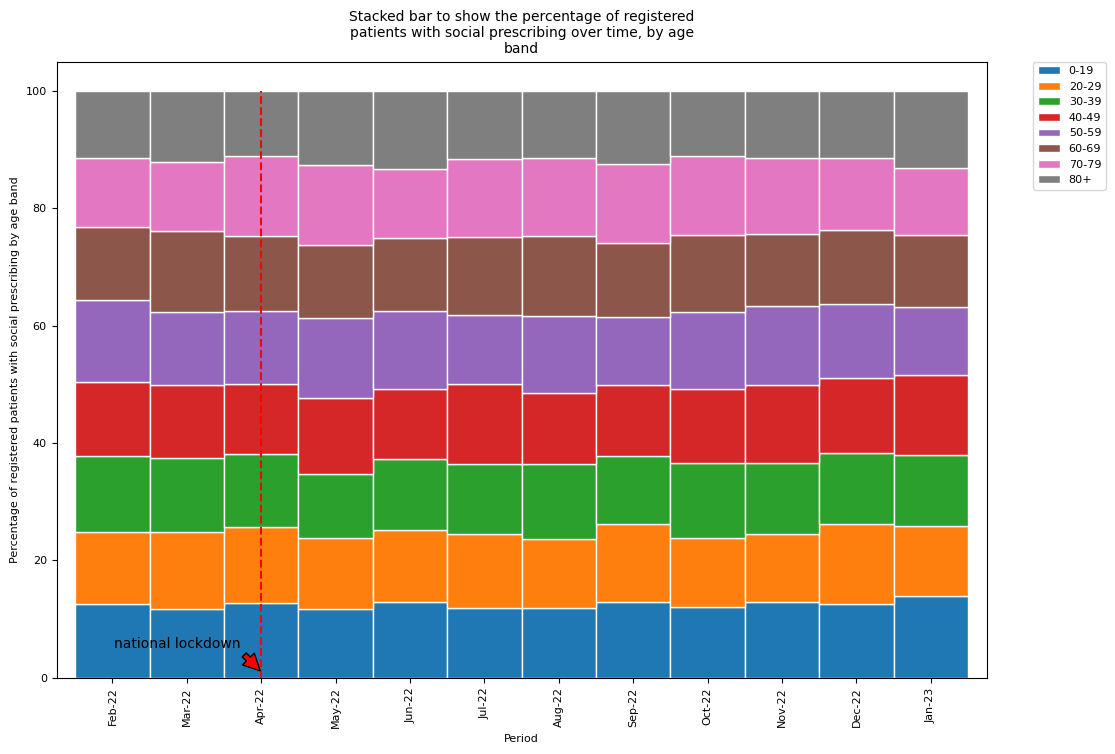

In [207]:
df_age_social_stacked = pd.DataFrame(df2)
df_age_social_stacked.head()
df_age_social_stacked.index = pd.to_datetime(df_age_social_stacked.index).strftime('%b-%y')
totas = df_age_social_stacked.sum(axis=1)
peras = df_age_social_stacked.div(totas, axis=0).mul(100).round(2)
ax = peras.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients with social prescribing by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients with social prescribing over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_social_prescribing_age_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [208]:
print(tabulate(peras.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(peras.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22   12.53    12.33    12.88    12.73    13.89    12.48    11.83  11.32
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Jan-23   13.99    11.83    12.18    13.54    11.68    12.18    11.42  13.19


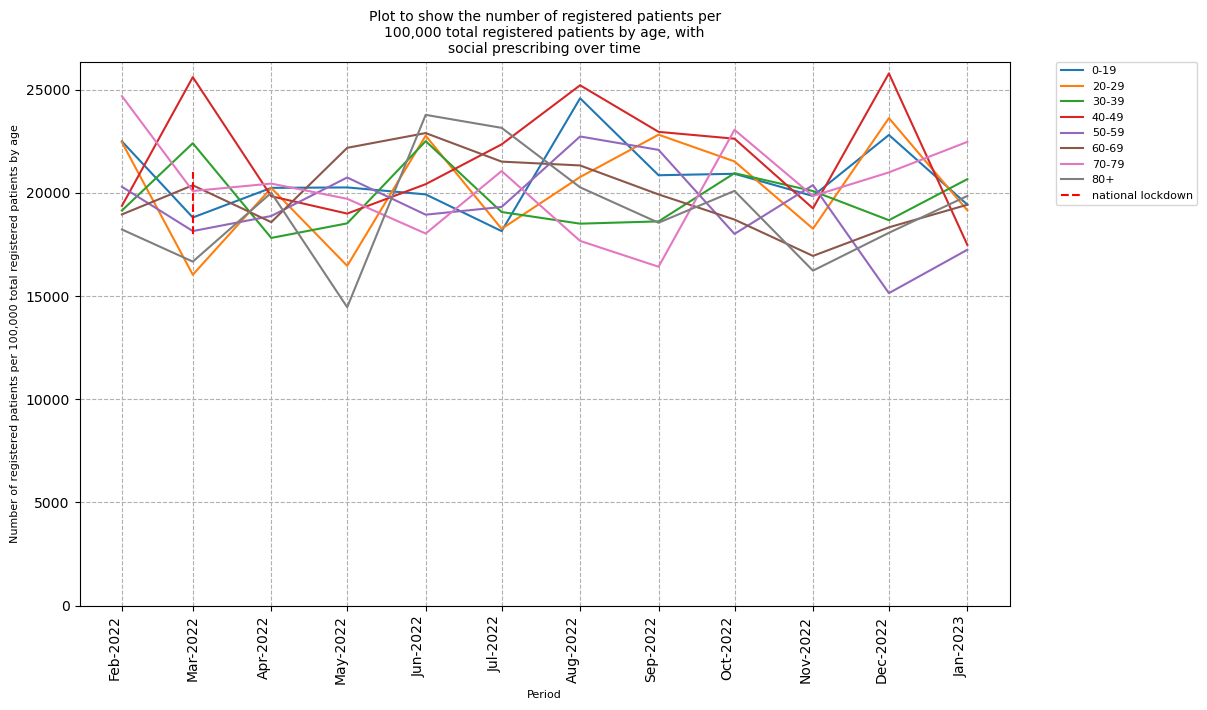

In [209]:
df1 = df.assign(weighted_population=lambda x: x.population / 100000)
df2 = df1.groupby(['date', 'age_band']).research_population.sum().unstack() / df1.groupby(['date', 'age_band']).weighted_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by age', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=18000,
        ymax=21000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by age, with social prescribing over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_age_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [210]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -------
2022-02-01 00:00:00   22490    22449  19140.6  19367.6  20289.9  18951.6  24680.9  18222.2
date                    0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
-------------------  -------  -------  -------  -------  -------  -------  -------  -------
2023-01-01 00:00:00  19424.5  19148.9  20661.2  17472.1  17241.4  19421.5    22467  19847.3


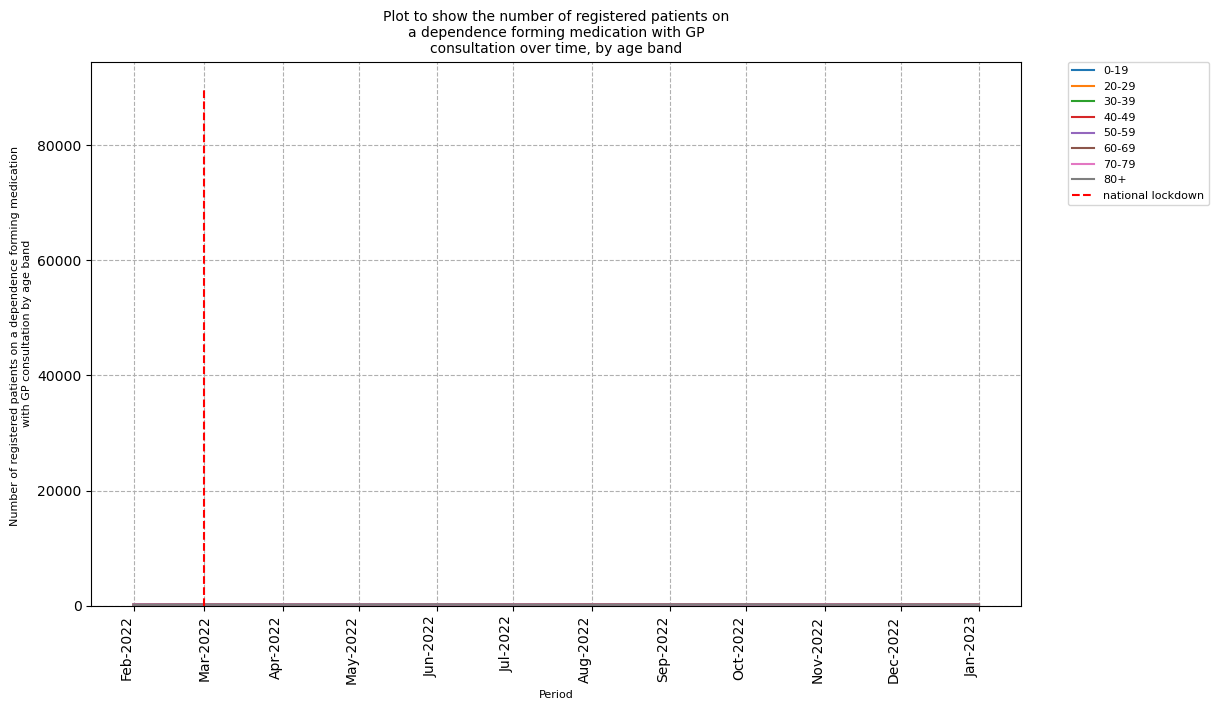

In [211]:
data_measure_consultation_age_rate = pd.read_csv("../output/measure_compare_medications_by_age_band_socialrx_v_consultation_rate.csv", usecols=["date", "age_band", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_consultation_age_rate = data_measure_consultation_age_rate.loc[data_measure_consultation_age_rate["with_consultation"] == 1, :]
data_measure_consultation_age_rate = data_measure_consultation_age_rate.loc[data_measure_consultation_age_rate["age_band"] != "missing", :]
df = pd.DataFrame(data=data_measure_consultation_age_rate)
df2 = df.groupby(['date', 'age_band']).research_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nwith GP consultation by age band', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=90000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients on a dependence forming medication with GP consultation over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_age_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [212]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2022-02-01 00:00:00     182      173      190      188      207      181      193    161
date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2023-01-01 00:00:00     193      189      187      189      165      192      177    162


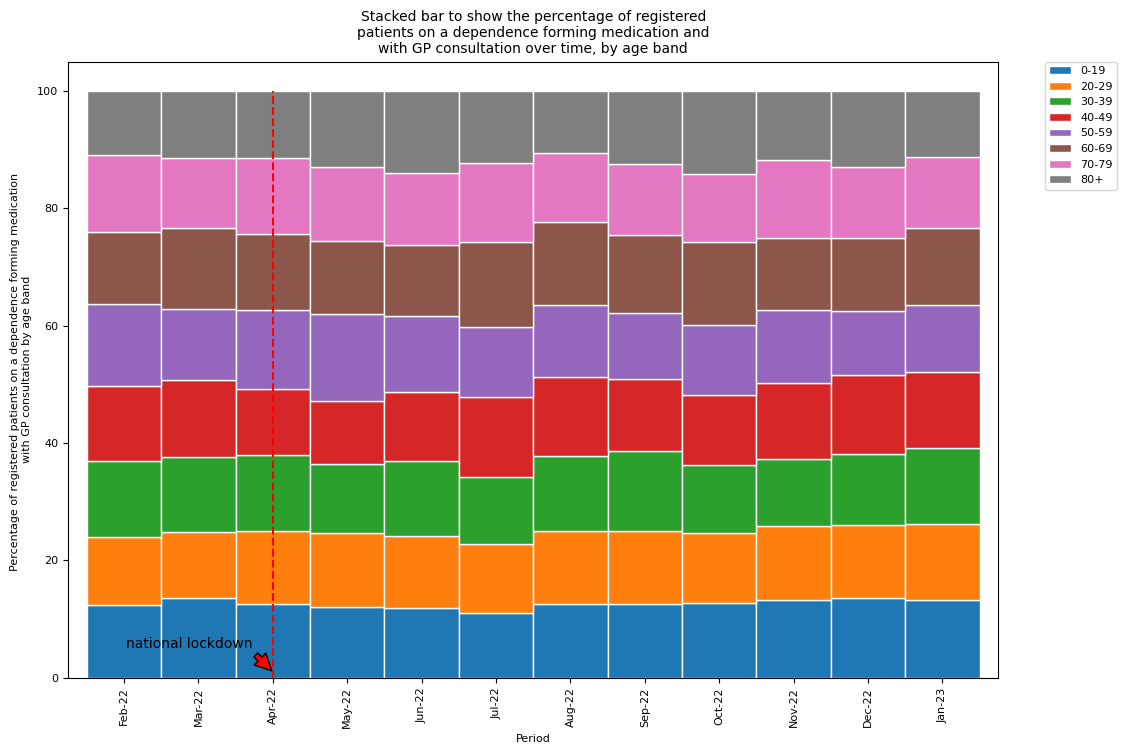

In [213]:
df_age_consult_stacked = pd.DataFrame(df2)
df_age_consult_stacked.head()
df_age_consult_stacked.index = pd.to_datetime(df_age_consult_stacked.index).strftime('%b-%y')
totac = df_age_consult_stacked.sum(axis=1)
perac = df_age_consult_stacked.div(totac, axis=0).mul(100).round(2)
ax = perac.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication \nwith GP consultation by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication and with GP consultation over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_gp_consultation_age_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [214]:
print(tabulate(perac.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perac.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22   12.34    11.73    12.88    12.75    14.03    12.27    13.08  10.92
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Jan-23   13.27       13    12.86       13    11.35     13.2    12.17  11.14


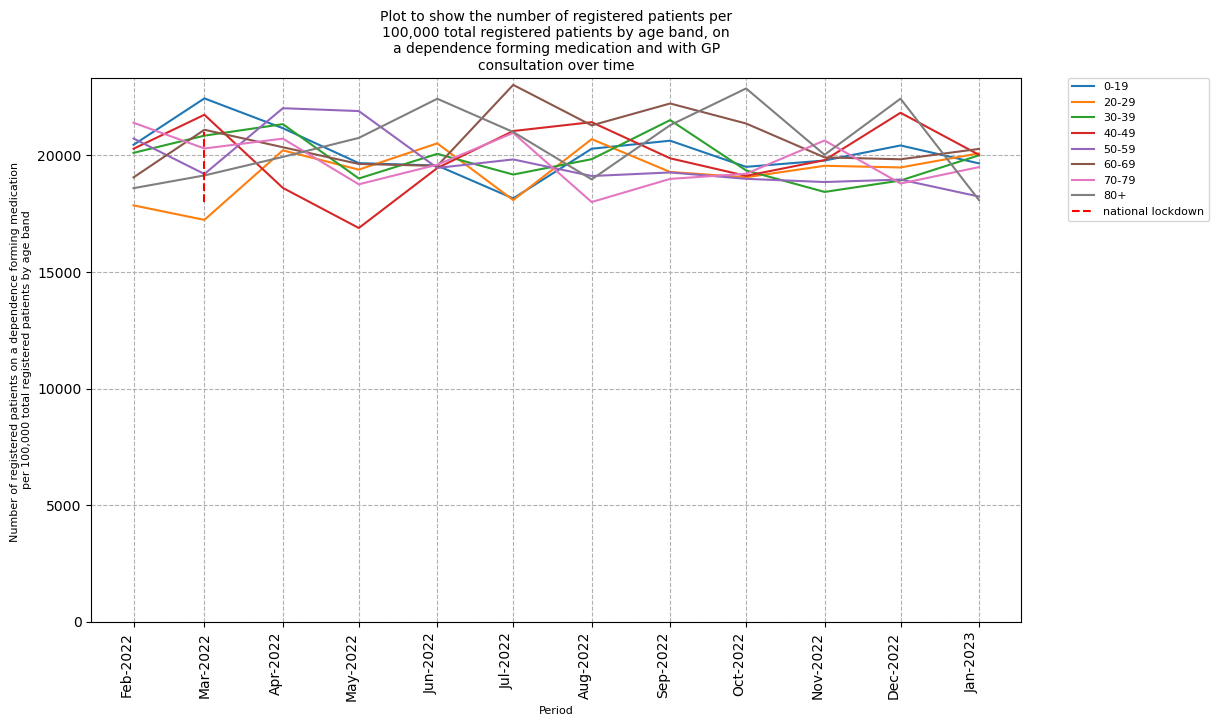

In [215]:
df1 = df.assign(weighted_population=lambda x: x.population / 100000)
df2 = df1.groupby(['date', 'age_band']).research_population.sum().unstack() / df1.groupby(['date', 'age_band']).weighted_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nper 100,000 total registered patients by age band', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=18000,
        ymax=21000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by age band, on a dependence forming medication and with GP consultation over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_age_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [216]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                    0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
-------------------  -------  -------  -------  -------  -------  -------  -------  -------
2022-02-01 00:00:00  20449.4  17853.5  20105.8  20280.5  20720.7  19052.6  21396.9  18591.2
date                    0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
-------------------  -------  -------  -------  -------  -------  -------  -------  -------
2023-01-01 00:00:00  19653.8    20085    20000  20021.2    18232  20274.6  19493.4  18080.4
